# Time-Series Forecasting with Prophet

Analytics Learning Exchange 2023

**Description of Session:** Want to predict the future? Now you can in just a few clicks! In this session, participants will learn about prophet, a forecasting package built by Facebook developers to make building time-series predictive models incredibly simple. Participants of this session will learn more about the package, the ins and outs of its core features, and get to see it in action to predict rat-related 311 requests at the city level. Attendees will walk away with a step-by-step example of how to use the package and may have some time exploring how to use it for themselves using their own data.

**Speaker:** Claire Boyd, MSc Candidate in Computational Analysis and Public Policy, University of Chicago

### Motivation

**What is Time Series Analysis or Forecasting?**

A time series *data* is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

Time series *forecasting* is a technique used in statistics and machine learning to **make predictions about future values based on historical data points that are ordered in time**. In a time series, each data point represents a measurement or observation taken at a specific time or over a specific time interval. 

A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.

**Why is it helpful?**

Time series analysis is very useful because of how **few inputs** we need in order to create accurate predictions. In order to create powerful time series models, all we need are **two variables** - a time stamp and the variable we want to analyze. 

Time series analysis can allow us to make more sophisticated predictions about what will happen next. Instead of just knowing that A/C usage will go up in the summer and down in the winter, we can make more sophisticated predictions of what will happen given years of historical trends and better account for contextualize recent fluctations.


General examples:
* Energy consumption in a neighborhood
* Purchasing raincoats
* Web traffic to social media sites

*Question for AnEx Members: What are some other NYC-specific examples where time series might be helpful?*

**How does time series forecasting work?**

The goal of time series forecasting is to break down historical data into multiple parts, capturing each component separately in order to mimic the variation of the model. 

The original time series is often split into 3 component series:

* **Seasonal**: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.
* **Trend**: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.
* **Random**: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

![Components of Time Series](https://anomaly.io/wp-content/uploads/2015/12/time-series-decomposition-seasonal-trend.png)

**How is this typically done?**

In short, there are a lot of different statistical or machine learning approaches to separating out our historical data into seasonal components, trend components, and the randomness we want to be left with. 

However, it quickly becomes very technical to parse out what the right approach is for your data, asking questions like:
* Is your data stationary?
* Does your data exhibit one seasonal trend (think: weekly fluctuations) or multiple seasonal trends (think: weekly, monthly, and yearly)?
* Does your data's seasonal trends grow with time (aka the effect of the seasonality increases with time)?
* Are there lags in your data, or are there relationships between your data at specified measurement points? Where are lags statistically significant?

![Time Series Model Options](https://timeseriesreasoning.files.wordpress.com/2021/06/4fb5f-1qmdvek1nz0bf5zgex1tvia.png)

The better you get at time series, the more these choices have meaning and you can make better predictions, but what if you don't have the time to understand these distinctions? How can you build a good time series model without knowing all of this?

Enter, prophet.

### What is Prophet?

Prophet is an open-source forecasting tool developed by Facebook's Core Data Science team. It is designed for forecasting time series data that exhibits various patterns such as trends, seasonality, and holidays (like we discussed above).

The idea of prophet is that most data practitioners are not experts in time series techniques, so the folks at Facebook have designed a way for you to forecast without needing to get into the nitty gritty of model selection and specification. 

Basically, it helps understand your data, choose a model that will best fit your data, and then make predictions based on the model it helps you select.

Here are some key features and characteristics of Prophet (available in python and R):

* Automatic Handling of Multiple Seasonalities: Prophet can handle time series data with multiple seasonal patterns, which is a common scenario in many real-world applications.

* Flexibility in Handling Holidays and Special Events: It allows you to include information about holidays and other special events that can impact the time series. This helps in modeling irregularities in the data.

* Robustness to Missing Data and Outliers: Prophet is designed to handle missing data and outliers in a robust manner. It uses a piecewise linear model to fit the data, which is less sensitive to extreme values.

* Intuitive Parameter Tuning: Prophet provides a simple and intuitive interface for adjusting hyperparameters. This makes it accessible to users with varying levels of expertise in time series forecasting.

* Built-in Visualization Tools: Prophet comes with built-in functions for visualizing the forecast and its components, which aids in model interpretation and validation.

Documentation here: https://facebook.github.io/prophet/

### Motivating Example: AirPassengers

To help us orient around how prophet works, let's choose a simple example with a classic machine learning data set AirPassengers. Here is a quick overview of what the dataset contains.
* Name: Monthly Airline Passenger Numbers 1949-1960
* Description: The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.
* Format: A monthly time series, in thousands.
* Source: Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.

The raw data for this dataset is [available on my github repository](https://github.com/claireboyd/anex_session/blob/main/AirPassengers.csv) and will be read in directly below.

Before we get started, let's make sure that we have pandas available and import it to this jupyter notebook.

In [1]:
pip install pandas

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

Great! Now that we have pandas, let's import our AirPassenger data and take a look at the dataframe and plot.

In [3]:
#url of practice dataset on github, and read in as pandas DataFrame
#url = "https://raw.githubusercontent.com/claireboyd/anex_session/main/AirPassengers.csv"
#airpassengers = pd.read_csv(url, sep=",")
airpassengers = pd.read_csv("AirPassengers.csv", sep=",")


# date object manipulation
airpassengers['date'] = pd.to_datetime(airpassengers['date'])
airpassengers

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Perfect - we have our data. Now let's plot it.

*Question for AnEx Participants: What can we notice about this plot? What components do we think are present in this data?*

<Axes: title={'center': 'International Airline Travel (1949-1960)'}, xlabel='Date', ylabel='Number of Air Passengers (in thousands)'>

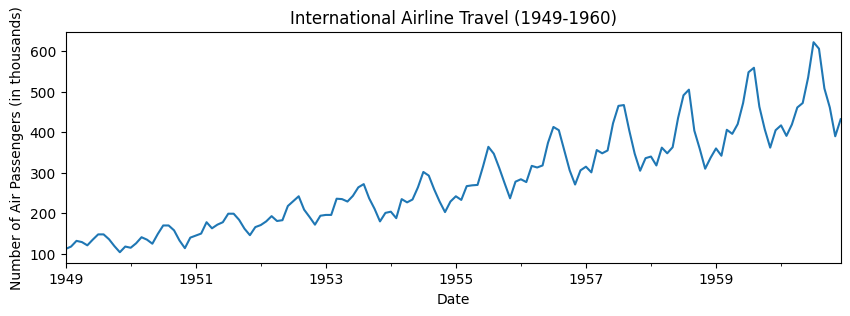

In [4]:
#plot using default pandas plot
airpassengers.plot(x='date',
                    y='value',
                    xlabel='Date',
                    ylabel="Number of Air Passengers (in thousands)",
                    legend=False,
                    title='International Airline Travel (1949-1960)',
                    figsize=(10,3))

Time to bring in prophet. [Note: I am working on a M1 Silicon Chip Mac, using Python 3.8. Here are the set-up instructions I needed: https://blog.quantinsti.com/installing-prophet-library-mac/ but you might have a simplier set up process.]

In [5]:
pip install Cython

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install h5py

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pystan==2.19.1.1

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install prophet

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from prophet import Prophet

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


#### Let's get forecasting.

From the [documentation](https://facebook.github.io/prophet/docs/quick_start.html#python-api), we can see that prophet is particular about the naming convention of our time stamp of our data as well as the variable name of what we want to predict.

Let's re-name our time series "ds" and our output variable "y".

In [10]:
airpassengers_prophet = pd.DataFrame()

airpassengers_prophet["ds"] = airpassengers["date"]
airpassengers_prophet["y"] = airpassengers["value"]
airpassengers_prophet

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


Perfect. Now let's create an out of the box model with prophet.

We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into the constructor. Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [11]:
m = Prophet()
m.fit(airpassengers_prophet)

13:21:10 - cmdstanpy - INFO - Chain [1] start processing
13:21:10 - cmdstanpy - INFO - Chain [1] done processing


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,500.086523,472.463041,529.309143
505,1961-11-28,498.471109,469.089404,527.949171
506,1961-11-29,496.117793,466.558627,523.882171
507,1961-11-30,493.067593,464.307631,519.791184
508,1961-12-01,489.379720,458.403538,519.317393


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

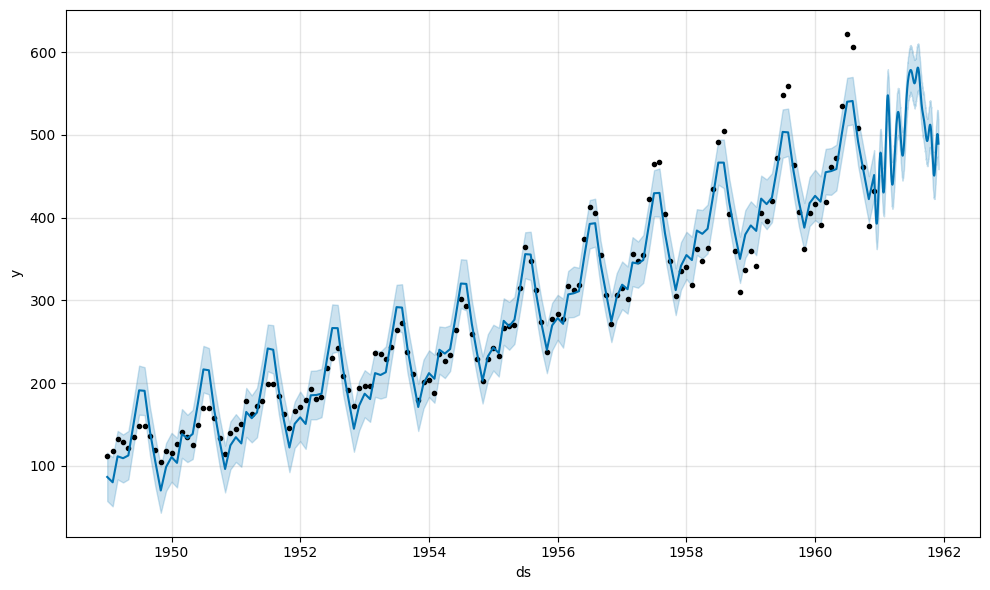

In [14]:
fig1 = m.plot(forecast)

Voila! We are forecasting future air passenger visits based on our original dataset!

Let's take a look at how prophet is doing this by examining the "components" of the model.

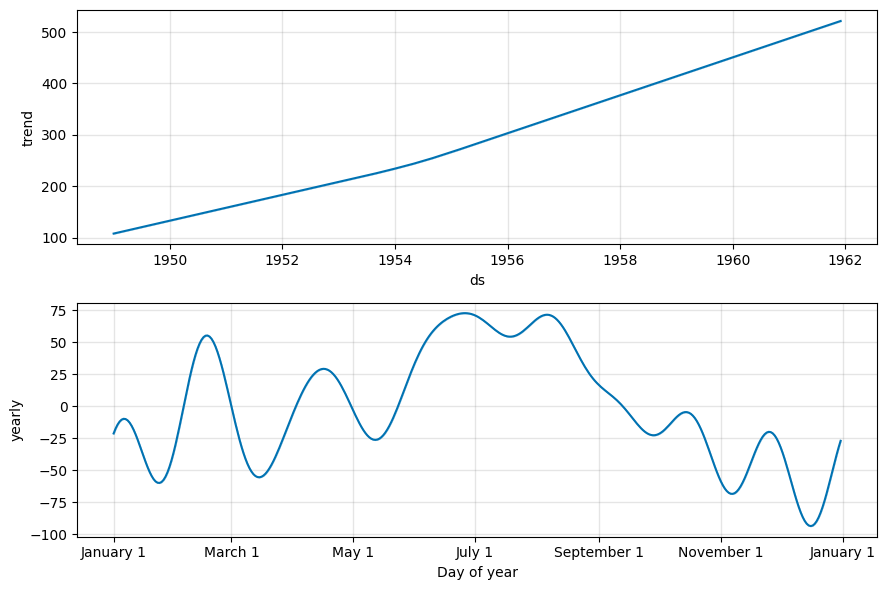

In [15]:
fig2 = m.plot_components(forecast)

#### What if we wanted to change the model a bit? How would we customize it?

We can always tell prophet what we know about the data to get better estimates. Let's take a look at the defaults and can evaluate if they apply in each circumstance.

In [16]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selec

Now that we know a bit more about what the defaults are we can correct for the small errors that prophet made.

In [17]:
#change periods to months (its monthly data)
future = m.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
151,1961-07-31
152,1961-08-31
153,1961-09-30
154,1961-10-31
155,1961-11-30


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,576.204198,544.739111,604.155661
152,1961-08-31,530.442367,499.211046,558.105121
153,1961-09-30,493.102059,466.415868,521.519483
154,1961-10-31,463.415994,435.526349,494.214453
155,1961-11-30,493.067593,463.213152,521.260845


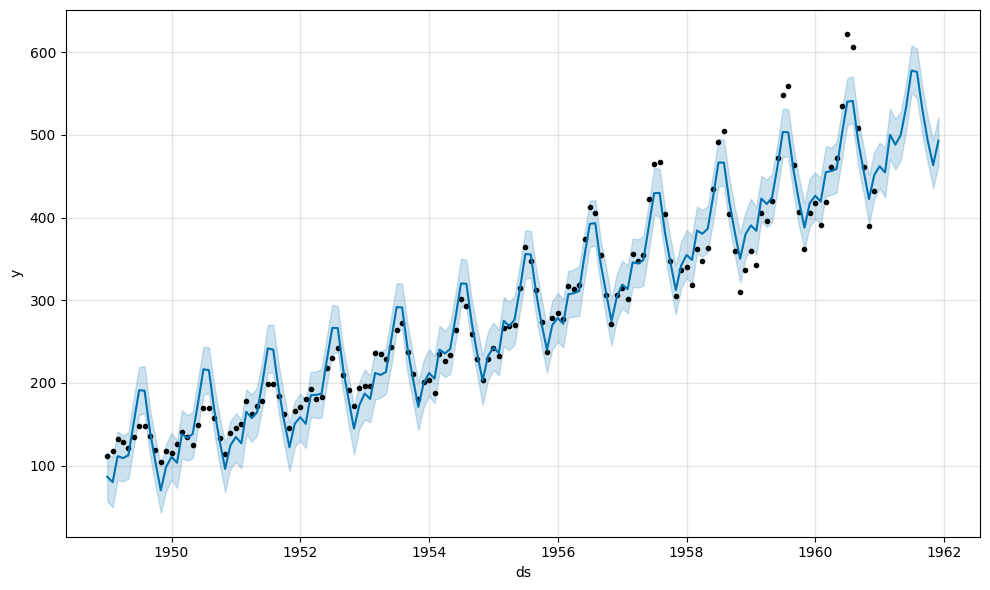

In [19]:
fig1 = m.plot(forecast)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.754658,56.549352,116.247541,107.754658,107.754658,-21.277622,-21.277622,-21.277622,-21.277622,-21.277622,-21.277622,0.0,0.0,0.0,86.477036
1,1949-02-01,109.889284,49.672499,110.470530,109.889284,109.889284,-29.901472,-29.901472,-29.901472,-29.901472,-29.901472,-29.901472,0.0,0.0,0.0,79.987813
2,1949-03-01,111.817334,82.622562,141.039109,111.817334,111.817334,-0.423821,-0.423821,-0.423821,-0.423821,-0.423821,-0.423821,0.0,0.0,0.0,111.393513
3,1949-04-01,113.951960,80.766584,136.707323,113.951960,113.951960,-4.841700,-4.841700,-4.841700,-4.841700,-4.841700,-4.841700,0.0,0.0,0.0,109.110261
4,1949-05-01,116.017728,84.258801,140.246800,116.017728,116.017728,-3.571278,-3.571278,-3.571278,-3.571278,-3.571278,-3.571278,0.0,0.0,0.0,112.446450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1961-07-31,509.221190,544.739111,604.155661,508.839214,509.466771,66.983007,66.983007,66.983007,66.983007,66.983007,66.983007,0.0,0.0,0.0,576.204198
152,1961-08-31,512.355507,499.211046,558.105121,511.901992,512.677079,18.086859,18.086859,18.086859,18.086859,18.086859,18.086859,0.0,0.0,0.0,530.442367
153,1961-09-30,515.388717,466.415868,521.519483,514.839083,515.780476,-22.286659,-22.286659,-22.286659,-22.286659,-22.286659,-22.286659,0.0,0.0,0.0,493.102059
154,1961-10-31,518.523034,435.526349,494.214453,517.903647,518.993770,-55.107040,-55.107040,-55.107040,-55.107040,-55.107040,-55.107040,0.0,0.0,0.0,463.415994


### Another Example: Time Series Modeling for Rat-related 311 Requests

To inform data-driven rodent mitigation, we can use historic data to give us a better picture of how many rat-related 311 requests we should expect given seasonal trends and compare those predictions to the observed values to prioritize different areas of the city for mitigation resources.

The following script uses [prophet](https://facebook.github.io/prophet/docs/installation.html#python) to create time-series predictive models hypertuned for each geography of interest (the whole city, boroughs, community boards, and rat mitigation zones). In order to build custom models and generate predictions for the PowerBI dashboard, the code below follows the following steps:
- ***Set up***: Reads in data, does initial data cleaning.
- ***Descriptive analysis***: Explores data to confirm time-series analysis is the right approach.
- ***Model development***: Tests different model parameters, using a grid search to choose the parameters that have the best model performance (using two specific metrics).
- ***Data Export for PowerBI***: Generates predictions for custom models at all geographies, and saves csvs to sharepoint folder.

### Set-up

#### Read-in relevant data

Use NYC Open Data Portal to source all rat-related 311 requests that trigger building inspections. This includes all requests that fall under the following complaint types:
* School Maintenance
* Food Establishment
* Rodent
* Maintenance or Facility
* Dead Animal
* Unsanitary Condition

Because not all requests under these types are rat-related, we can subset based on specific descriptors when reading in the data using a specific query.

In [21]:
pip install sodapy

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import input.helpers as helpers

Use function in `helpers.py` to get rat-related requests and show the number of observations of the resulting dataframe.

In [23]:
df_raw = helpers.get_rat_requests(dataset_id="erm2-nwe9")

# show (observations, variables) in the rat complaints dataframe
df_raw.shape

(744000, 43)

In [24]:
df_raw.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,bridge_highway_direction,road_ramp,bridge_highway_segment,due_date,facility_type,created_date_dt,date,week,month,year
0,59970638,2024-01-10T00:37:37.000,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,11220,5118 5 AVENUE,5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,2024-01-10 00:37:37,2024-01-10,2,1,2024
1,59975598,2024-01-09T23:57:56.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11433,106-54 GUY R BREWER BOULEVARD,GUY R BREWER BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,2024-01-09 23:57:56,2024-01-09,2,1,2024
2,59975589,2024-01-09T23:57:56.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11433,106-54 GUY R BREWER BOULEVARD,GUY R BREWER BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,2024-01-09 23:57:56,2024-01-09,2,1,2024
3,59970373,2024-01-09T23:57:12.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10009,435 EAST 9 STREET,EAST 9 STREET,...,NaN,NaN,NaN,NaN,NaN,2024-01-09 23:57:12,2024-01-09,2,1,2024
4,59978270,2024-01-09T23:57:12.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10009,435 EAST 9 STREET,EAST 9 STREET,...,NaN,NaN,NaN,NaN,NaN,2024-01-09 23:57:12,2024-01-09,2,1,2024


Check to make sure that all of the rat-related request types are appearing as expected.

In [25]:
df_raw.groupby(['complaint_type', 'descriptor']).agg({'unique_key':'count'})

unique_key
complaint_type          descriptor                         
Dead Animal             Rat or Mouse                   2778
Food Establishment      Rodents/Insects/Garbage       37717
Maintenance or Facility Rodent Sighting               11640
Rodent                  Rat Sighting                 234512
                        Signs of Rodents              36920
School Maintenance      Rodents/Mice                   2977
UNSANITARY CONDITION    PESTS                        417456

The raw requests dataframe includes categorical variables with different levels of geography that will be helpful later (e.g. `community_board` and `borough`) but it does not include our custom 'rat mitigation zones' (RMZs). Using a shapefile saved locally, we can add on an additional categorical variable (`rat_mitigation_zone`) that will indicate which requests are within RMZs.

In [26]:
pip install geopandas

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
import geopandas as gpd

# convert df to gdf and read in rmz shapefile
gdf = gpd.GeoDataFrame(df_raw, geometry = gpd.points_from_xy(df_raw.longitude, df_raw.latitude))
rmzs = gpd.GeoDataFrame.from_file('input/rmz/rmz.shp')

# indicate which requests are within the rmz boundaries
df_with_rmz_labels = gpd.sjoin(gdf, rmzs, how='left', predicate='within')

# Convert revised to df
df = pd.DataFrame(df_with_rmz_labels).rename(columns={'Label':'rat_mitigation_zone',
                                               'NRRType':'is_rmz'})

/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/ipykernel_9269/1129823517.py:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df_with_rmz_labels = gpd.sjoin(gdf, rmzs, how='left', predicate='within')


In [28]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,...,week,month,year,geometry,index_right,OBJECTID_1,rat_mitigation_zone,is_rmz,Shape_Leng,Shape_Area
0,59970638,2024-01-10T00:37:37.000,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Rodents/Insects/Garbage,Restaurant/Bar/Deli/Bakery,11220,5118 5 AVENUE,5 AVENUE,...,2,1,2024,POINT (-74.01107 40.64439),NaN,NaN,NaN,NaN,NaN,NaN
1,59975598,2024-01-09T23:57:56.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11433,106-54 GUY R BREWER BOULEVARD,GUY R BREWER BOULEVARD,...,2,1,2024,POINT (-73.79296 40.69889),NaN,NaN,NaN,NaN,NaN,NaN
2,59975589,2024-01-09T23:57:56.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,11433,106-54 GUY R BREWER BOULEVARD,GUY R BREWER BOULEVARD,...,2,1,2024,POINT (-73.79296 40.69889),NaN,NaN,NaN,NaN,NaN,NaN
3,59970373,2024-01-09T23:57:12.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10009,435 EAST 9 STREET,EAST 9 STREET,...,2,1,2024,POINT (-73.98321 40.72750),2.0,64.0,Manhattan East Village and Chinatown,RMZ Zone,0.105621,0.000454
4,59978270,2024-01-09T23:57:12.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10009,435 EAST 9 STREET,EAST 9 STREET,...,2,1,2024,POINT (-73.98321 40.72750),2.0,64.0,Manhattan East Village and Chinatown,RMZ Zone,0.105621,0.000454


Add new col with custom names for RMZs

In [29]:
#change names of RMZs
new_rmz_names = {'Harlem Rat Mitigation Zone':'RMZ Harlem',
                 'Bronx Grand Concourse Zone':'RMZ Bronx',
                 'Brooklyn Bed Stuy and Bushwick':'RMZ Brooklyn',
                 'Manhattan East Village and Chinatown':'RMZ Chinatown/East Village',
                 np.nan: np.nan                 
                }

df['rat_mitigation_zone'] = df['rat_mitigation_zone'].apply(lambda x: new_rmz_names[x])

### Descriptive analysis

Using the prepared rat-related requests dataframe, we can take a look at some descriptive trends to ensure that a time-series model is the best approach to predict rat-related requests at the daily or weekly level.

In order to streamline this process, I made the following function to aggregate data by a 'level' (week, date or month).

In [30]:
import matplotlib.pyplot as plt
import datetime

In [31]:
def get_aggregates(df, level):
    '''
    Aggregates the input dataframe at the indicated 'level'.
    
    Inputs:
        df (pandas Dataframe): df output from the above data cleaning and set-up.
        level (str): a string to indicate which level to aggregate the number of rat-related 311 requests
            'date' for daily, 'week' for weekly, 'month' for monthly.
    
    Returns: aggregated pandas Dataframe with only 2 columns that are necessary for prophet time series predictions
        ('ds' as the date, and 'y' as the outcome variable of interest)
    '''
    # group by date to get count of 311 rat-related complaints by level
    aggregated_df = df.groupby([level, "year"]).agg({'unique_key':'count',
                                               'created_date':'last'}).reset_index().rename(columns={'unique_key':'y',
                                                                                                       'created_date': 'ds_str'})
    # reformat ds as datetime type
    aggregated_df.loc[:,'ds'] = pd.to_datetime(aggregated_df.loc[:,'ds_str']).dt.round('D')
    aggregated_df = aggregated_df.loc[:,["ds", 'y']].sort_values('ds', ascending=True)
    
    
    # only keep full weeks worth of data - must be less than or equal to the most recent saturday
    today = datetime.date.today()
    idx = (today.weekday() + 1) % 7 # MON = 0, SUN = 6 -> SUN = 0 .. SAT = 6
    last_saturday = today - datetime.timedelta(7+idx-6)

    aggregated_df = aggregated_df.loc[aggregated_df.loc[:,'ds'] <= pd.to_datetime(last_saturday),:]
    
    return aggregated_df

First - we can take a look at daily aggregates of rat-related requests to see if there are year-to-year or seasonal patterns. On a first glance, we can see that there is a big uptick in rat-related requests in the spring of 2014 and strong yearly seasonal trends from 2014-2023. There is a dip in rat-related requests in the spring of 2020 but similar yearly trends seem to pick up by the summer of 2020.

<Axes: title={'center': 'Rat-Related 311 Requests (Jan 2010-July 2023) by Day'}, xlabel='Date', ylabel='Count of Rat-Related 311 Requests'>

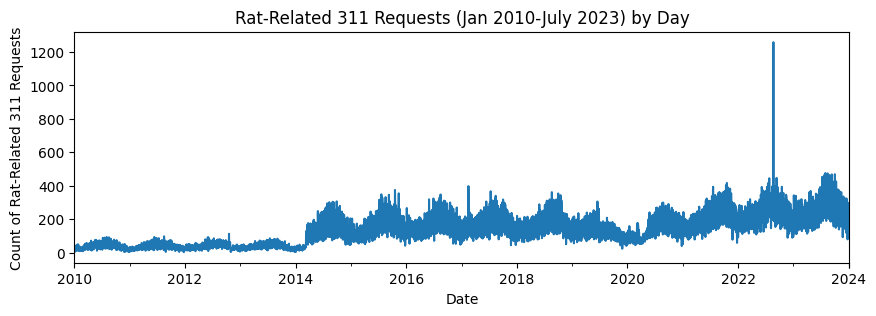

In [32]:
daily = get_aggregates(df, level='date')

#plot daily cases
daily.plot(x='ds', 
           y='y',
           xlabel='Date',
           ylabel="Count of Rat-Related 311 Requests",
           legend=False,
           title='Rat-Related 311 Requests (Jan 2010-July 2023) by Day',
           figsize=(10,3))

To give more context around the uptick of rat-related requests in 2014, let's take a look at the annual trends of each type of complaint. The below plot indicates that unsanitary condition requests started to be categorized in 2014 and Dead Animal requests started to be categorized in 2021. This unsanitary condition uptick gives us more clarity that rat-related 311 requests didn't only increase in 2014 due to additional requests but increased due to additional categories of rat-related requests.

<Axes: title={'center': 'Annual Volume of 311 Requests by Complaint Type'}, xlabel='Year', ylabel='Number of Rat-related 311 requests'>

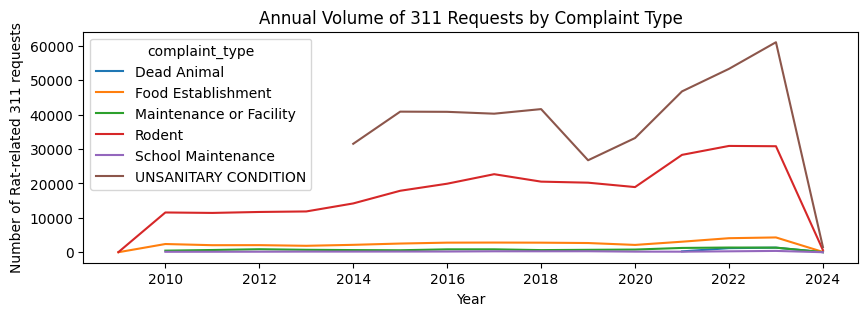

In [33]:
# number of complaints by year and by complaint type
yearly = df.groupby(["year", "complaint_type"]).agg({'unique_key':'count'}).reset_index().rename(columns={'unique_key':'count'})
yearly = yearly.pivot(index='year', columns='complaint_type', values='count').reset_index().reindex()

# plot yearly complaints by type
yearly.plot(x='year',
                 title='Annual Volume of 311 Requests by Complaint Type',
                 xlabel='Year',
                 ylabel="Number of Rat-related 311 requests",
                 figsize=(10,3))

Similar to the daily trend data, there seem to be strong yearly seasonal trends after 2014.

<Axes: title={'center': 'Rat-Related 311 Requests (Jan 2010-July 2023) by Week'}, xlabel='Date', ylabel='Count of Rat-Related 311 Requests'>

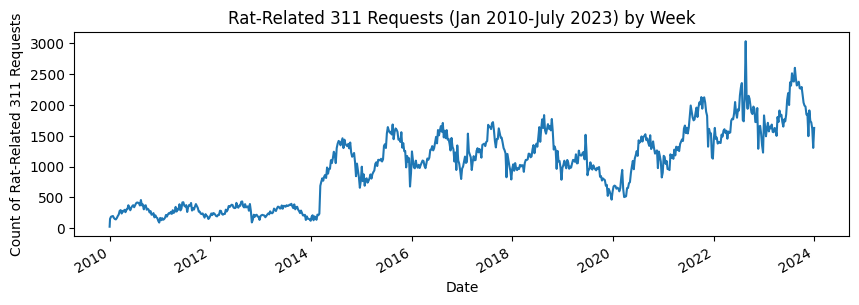

In [34]:
weekly = get_aggregates(df, level='week')

# plot weekly cases
weekly.plot(x='ds',
           y='y',
           xlabel='Date',
           ylabel="Count of Rat-Related 311 Requests",
           legend=False,
           title='Rat-Related 311 Requests (Jan 2010-July 2023) by Week',
           figsize=(10,3))

Plotting weekly totals by the week of the year (0-52, because python starts counting at 0), we can see that there is a clear curve of yearly cases. Across all years of data, rat-related 311 requests start lower in the beginning of the year, peak in the summer, and then drop off towards the end of the year in colder months. The darker lines depict averages over time-based clusters (2010-2013, 2014-2016, 2017-2019, 2020, 2021-2023).

Text(0.5, 0, 'Week of the Year')

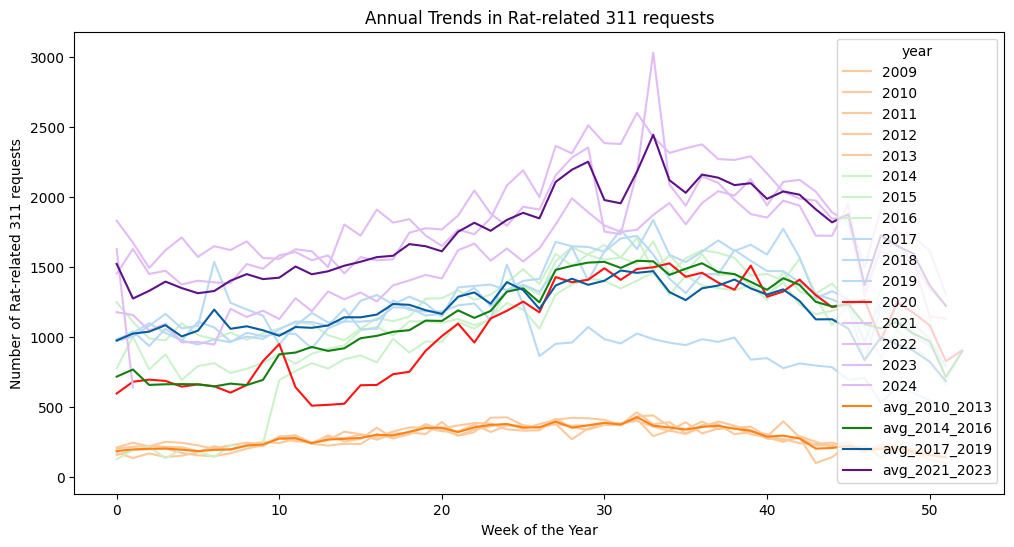

In [37]:
# agg number of complaints by week, year
weekly_summary = df.groupby(["week", "year"]).agg({'unique_key': 'count'}).reset_index().rename(columns={'unique_key': "count"})
weekly_summary = weekly_summary.pivot(index='week', columns='year', values='count').reset_index().reindex()

# create new cols with averages
weekly_summary['avg_2010_2013'] = weekly_summary[[2010, 2011, 2012, 2013]].mean(axis=1)
weekly_summary['avg_2014_2016'] = weekly_summary[[2014, 2015, 2016]].mean(axis=1)
weekly_summary['avg_2017_2019'] = weekly_summary[[2017, 2018, 2019]].mean(axis=1)
weekly_summary['avg_2021_2023'] = weekly_summary[[2021, 2022, 2023, 2024]].mean(axis=1)
weekly_summary = weekly_summary.drop(['week'], axis=1)

weekly_summary.plot(use_index=False,
                     color={#group - orange
                            'avg_2010_2013': "#ff8112",
                            2009: "#fcc99d",
                            2010: "#fcc99d",
                            2011: "#fcc99d",
                            2012: "#fcc99d",
                            2013: '#fcc99d',
                            #group - green
                            'avg_2014_2016': '#10800e',
                            2014: '#ccf2cb',
                            2015: '#ccf2cb',
                            2016: '#ccf2cb',
                            #group - blue
                            'avg_2017_2019': '#055c9e',
                            2017: '#b8daf5',                         
                            2018: "#b8daf5",
                            2019: "#b8daf5",
                            #red
                            2020: "#ff1212",
                            #group - purple
                            'avg_2021_2023': '#5e1085',
                            2021: '#e2bcf5',
                            2022: '#e2bcf5',
                            2023: '#e2bcf5',
                            2024: '#e2bcf5'
                            },
                     xlabel="Week of the Year",
                     ylabel="Number of Rat-related 311 requests",
                     figsize=(12,6),
                     title="Annual Trends in Rat-related 311 requests"
                     )

plt.xlabel("Week of the Year")

<Axes: title={'center': 'Rat-Related 311 Requests (Jan 2010-July 2023) by Month'}, xlabel='Date', ylabel='Count of Rat-Related 311 Requests'>

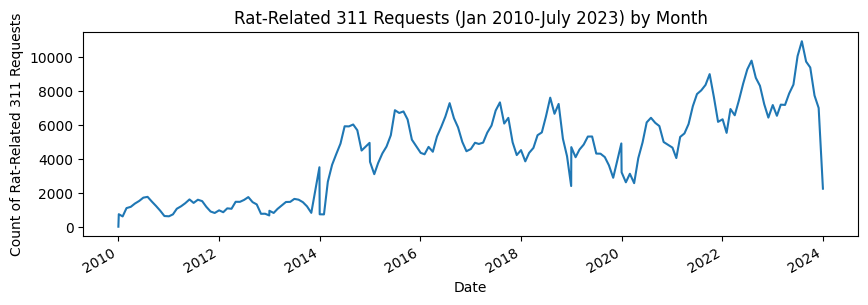

In [38]:
monthly = get_aggregates(df, level='month')

# plot weekly cases
monthly.plot(x='ds',
           y='y',
           xlabel='Date',
           ylabel="Count of Rat-Related 311 Requests",
           legend=False,
           title='Rat-Related 311 Requests (Jan 2010-July 2023) by Month',
           figsize=(10,3))

#### Subsetting train and test sets

Given the descriptive trends above, we need to decide what subset of the data to use to train our time-series model. Given that unsanitary conditions only started to be categorized in the spring of 2014, we can train the model on data after that shift in order to minimize the likelihood that the model will try to model based on that shift. *That said, the model will be trained on data from June 2014-2022 and tested on data after June 2022.*

The data is available at the daily level, but there are significant weekly trends (e.g. fewer complaints on sat/sun) so we can try modeling two different levels of aggregation (daily and weekly totals).

In [39]:
import datetime

def train_test_split(df,
                     n_months_to_predict=3,
                     train_start=None, 
                     train_end=None, 
                     test_start=None, 
                     test_end=None):
    '''
    Split a dataset into training and testing data based on input dates and level of aggregation.
    
    Inputs:
        df (pandas dataframe)
        train_start (str): in format "YYYY-MM-DD"
        train_end (str): in format "YYYY-MM-DD"
        test_start (str): in format "YYYY-MM-DD"
        test_end (str): in format "YYYY-MM-DD"
    
    Returns:
        df_train (pandas dataframe)
        df_test (pandas dataframe)
    '''
    #set defaults given n_months_to predict
    if test_end is None:
        #offset by one day so that it is complete data
        test_end = datetime.date.today() - pd.DateOffset(days=1) 

    if test_start is None:
        #get n months of data given input n_months
        test_start = test_end - pd.DateOffset(months=n_months_to_predict)

    if train_end is None:
        #offset train end by one day before test start
        train_end = test_start - pd.DateOffset(days=1)
    
    if train_start is None:
        train_start = '2014-06-01'

    for date in [train_start, train_end, test_start, test_end]:
        date = pd.to_datetime(date)
       
    train = df.loc[(df.loc[:,'ds'] >= train_start) & (df.loc[:,'ds'] < train_end),:] 
    test = df.loc[(df.loc[:,'ds'] >= test_start) & (df.loc[:,'ds'] < test_end),:]
    
    return train, test

The below visualizations clarify what data is used to train and test the daily and weekly models.

##### Daily

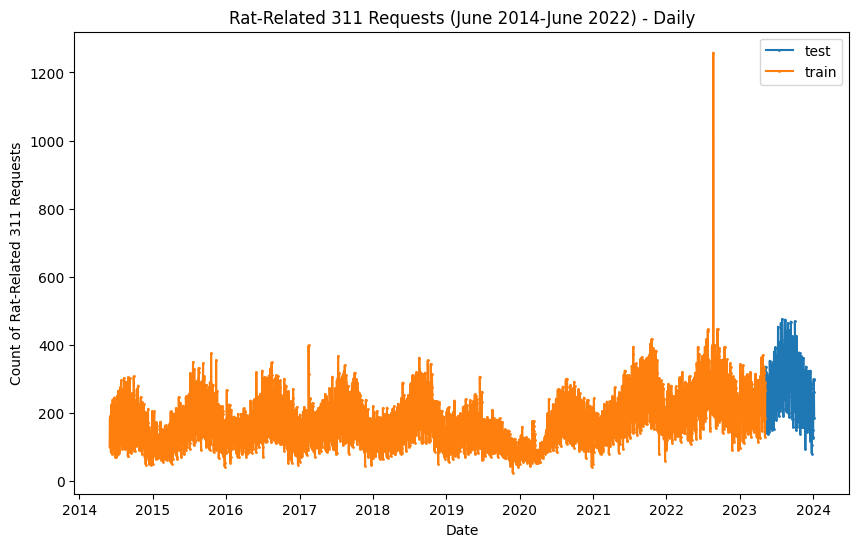

In [40]:
#use function to get training and test data sets
daily_train, daily_test = train_test_split(df=daily, n_months_to_predict=8)
daily_subset = pd.concat([daily_train, daily_test], axis=0, keys=['train', 'test']).reset_index()

# plot training and testing data
plt.figure(figsize=(10,6))
groups = daily_subset.groupby('level_0')

for name, group in groups:
    plt.plot(group.ds, 
             group.y,
             marker='o', 
             linestyle='-', 
             markersize=1, 
             label=name)

plt.xlabel('Date')
plt.ylabel('Count of Rat-Related 311 Requests')
plt.title('Rat-Related 311 Requests (June 2014-June 2022) - Daily')
plt.legend()

##### Weekly

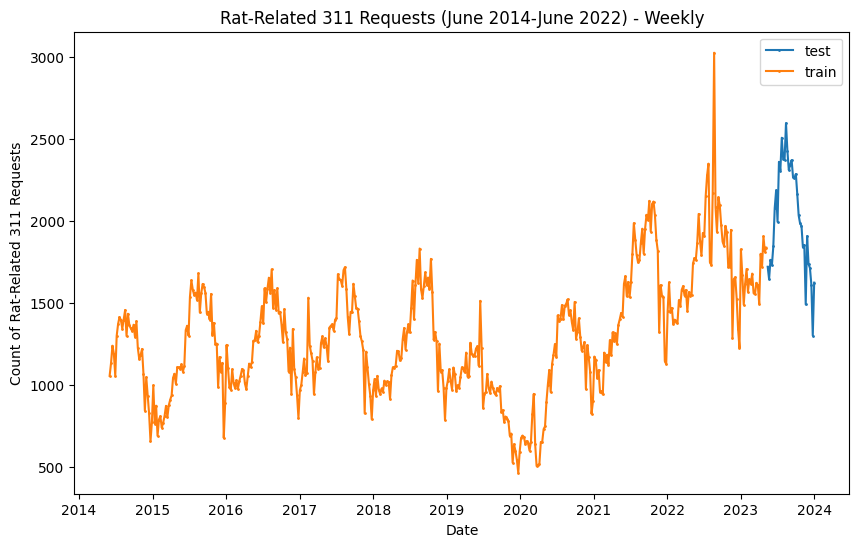

In [41]:
#use function to get training and test data sets
weekly_train, weekly_test = train_test_split(df=weekly, n_months_to_predict=8)
weekly_subset = pd.concat([weekly_train, weekly_test], axis=0, keys=['train', 'test']).reset_index()

# plot training and testing data
plt.figure(figsize=(10,6))
groups = weekly_subset.groupby('level_0')

for name, group in groups:
    plt.plot(group.ds, 
             group.y,
             marker='o', 
             linestyle='-', 
             markersize=1, 
             label=name)

plt.xlabel('Date')
plt.ylabel('Count of Rat-Related 311 Requests')
plt.title('Rat-Related 311 Requests (June 2014-June 2022) - Weekly')
plt.legend()

##### Monthly

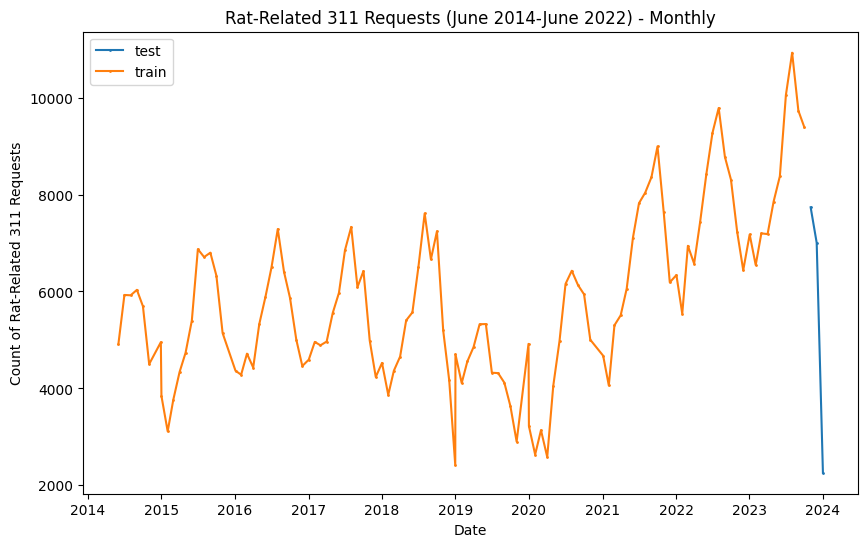

In [42]:
#use function to get training and test data sets
monthly_train, monthly_test = train_test_split(df=monthly, n_months_to_predict=3)
monthly_subset = pd.concat([monthly_train, monthly_test], axis=0, keys=['train', 'test']).reset_index()

# plot training and testing data
plt.figure(figsize=(10,6))
groups = monthly_subset.groupby('level_0')

for name, group in groups:
    plt.plot(group.ds, 
             group.y,
             marker='o', 
             linestyle='-', 
             markersize=1, 
             label=name)

plt.xlabel('Date')
plt.ylabel('Count of Rat-Related 311 Requests')
plt.title('Rat-Related 311 Requests (June 2014-June 2022) - Monthly')
plt.legend()

### Model Development

#### Overview of Prophet Model

The Prophet model is a time series forecasting tool developed by Facebook's Core Data Science team. It is designed to handle time series data with strong seasonal patterns and holidays. The model incorporates various components, including trend, seasonality (modeled using Fourier series), and holiday effects, providing an easy-to-use and effective solution for forecasting tasks. Prophet models can be tuned with a variety of trend and seasonality/holiday parameters.

In [43]:
import prophet
from prophet import Prophet
import matplotlib.pyplot as plt
import itertools

#### Assessing Model Fit

Before we play around with changing our model parameters, we will define a few measures of model performance to compare models to each other.

* **Coverage of Prediction Intervals:** If your Prophet model provides prediction intervals, you can assess how well the intervals capture the actual data. A higher percentage of actual data falling within the prediction intervals indicates better calibration. If we maximize being “within” prediction intervals, we are optimizing the model for the shape of the data and predicting outliers successfully. This puts less weight on individual weekly predictions being accurate, but rather that the most values are within the range we are looking at. Right now, this makes the most sense to be based on what we want to use the model for!

* **Mean Absolute Percentage Error (MAPE):** MAPE measures the percentage difference between the actual and predicted values. It provides a relative measure of the forecasting accuracy, making it easier to interpret. MAPE is not sensitive to the scale of the data, making it more appropriate when dealing with datasets with varying scales. One limitation of MAPE is that it can be sensitive to small actual values, as the percentage error can become very large for small denominators. This can result in a larger impact on the overall error for smaller actual values. MAPE values closer to zero indicate better performance. If we prioritize minimizing MAPE, we are selecting the model that minimizes the average percentage of the actual value of rat-related 311 requests the prediction is off by in our test data set. This metric might do worse with smaller geographies because the magnitude of those values are so small so the percentage adjustments would be larger for those differences between the predicted and actual values (think: a small Bronx community district with 5 rat-related requests one week and 20 the next month would likely do poorly and this metric might be high).
    
As we finetune our model parameters, we are aiming to maximize the coverage of prediction intervals (first priority) and minimize MAPE (second priority).

In [44]:
import numpy as np

def percentage_in_confidence_interval(forecast):
    '''
    Calculates the number of actual values that fall within the predicted confidence interval (80% certainty) 
    
    Input: pandas Dataframe, "forecast" output from prophet model
    Return: dictionary (key is string, value is float) which has percentages of actual values that fall
        within expected range, above expected range, and below the expected range.
    '''
    # create new column in df that categorizes the yhat in relation to y
    forecast.loc[:,'in_conf_int'] = "within expected range"
    forecast.loc[(forecast.loc[:,'y'] > forecast.loc[:,'yhat_upper']), 'in_conf_int'] = "above expected range"
    forecast.loc[(forecast.loc[:,'y'] < forecast.loc[:,'yhat_lower']), 'in_conf_int'] = "below expected range"
    
    # return dictionary of frequencies of each of those values
    return dict((forecast.loc[:,'in_conf_int'].value_counts()/forecast.shape[0])*100)

def mean_absolute_percentage_error(forecast):
    '''
    Calculates the mean absolute percentage error of the forecast.
    
    Inputs: pandas Dataframe, "forecast" output from prophet model
    Return: MAPE as a float
    '''
    y_true, y_pred = np.array(forecast.loc[:,'y']), np.array(forecast.loc[:,'yhat'])
    return (np.mean(np.abs(y_true - y_pred) / y_true) * 100)

Because we'll be making a lot of different models and want to test for their fit, lets make a function that creates a plot of predictions given a model and returns the forecast as a dataframe so that we can calculate MAPE and percent in confidence interval.

In [45]:
def get_forecast(model, train, test, level, plot=True, title_suffix=''):
    '''
    Get the forecast table from prophet, and plot if indicated.
    
    Inputs: 
        model: Prophet model object
        train: pandas Dataframe of train data (includes 'ds','y' - output of train_test_split function)
        test: pandas Dataframe of test data (includes 'ds','y'- output of train_test_split function)
        plot: boolean - defaults to True
        title suffix: string, used when labeling plots for smaller geographies.
    
    Returns: pandas Dataframe of forecast (note: if plot=True, the plot is printed but it is not returned.)
    '''
    #set number of predictions based on the size of the test data
    periods = test.shape[0]
    
    if level == "date":
        freq='D'
    if level == "week":
        freq='W'
    if level == "month":
        freq='M'
    
    # fit model with train data
    model.fit(train)

    # predict 1 year of data
    future = model.make_future_dataframe(periods=periods, include_history=False, freq=freq)
    forecast = model.predict(future)

    # join in 1 year of test data to forecase (actual values)
    test = test.set_index(forecast.index)
    forecast.loc[:,'y'] = test.loc[:,'y']

    if plot == True:
        # plot forecast
        fig1 = model.plot(forecast, figsize=(10,3))
        a = prophet.plot.add_changepoints_to_plot(fig1.gca(), model, forecast)

        plt.scatter(x=test['ds'], y=test['y'], c='red',marker='.')
        plt.xlabel("Year")
        plt.ylabel("Number of Rat-Related 311 Requests")
        
        if title_suffix != '':
            plt.title(level.title()+" Predicted Rat-Related 311 Calls for "+ title_suffix)
        else:
            plt.title(level.title()+" Predicted Rat-Related 311 Calls")
    
    return forecast

#### Default Models (daily, weekly, monthly)

Before we start fine tuning our model parameters, let's look at the model fit with the baseline, out-of-the-box model at the daily, monthly, and weekly levels.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/rukvh_pr.json
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/gpnc15vg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58778', 'data', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/rukvh_pr.json', 'init=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/gpnc15vg.json', 'output', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/prophet_modelaagxpmry/prophet_model-20240111132539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1

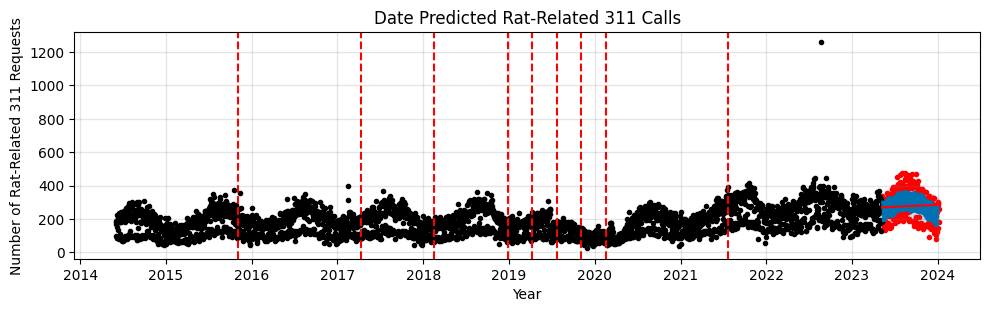

In [46]:
daily_m = Prophet()

daily_forecast = get_forecast(model=daily_m, 
                              train=daily_train, 
                              test=daily_test, 
                              level="date")

In [47]:
percentage_in_confidence_interval(daily_forecast)

{'within expected range': 52.066115702479344,
 'below expected range': 28.09917355371901,
 'above expected range': 19.834710743801654}

In [48]:
mean_absolute_percentage_error(daily_forecast)

24.998319650721022

Let's compare this running the default model on our weekly data.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/6j7fxeg3.json
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/q5v97ppy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92584', 'data', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/6j7fxeg3.json', 'init=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/q5v97ppy.json', 'output', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/prophet_modelnp66flmq/prophet_model-20240111132546.csv', 'method=optimize', 'algorithm=

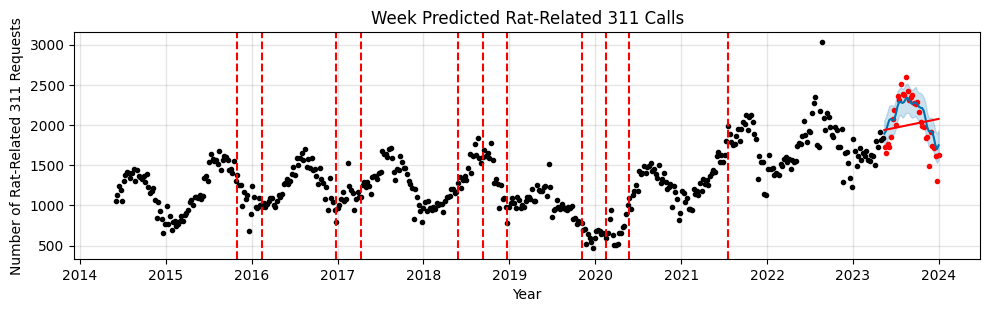

In [49]:
weekly_m = Prophet()

weekly_forecast = get_forecast(model=weekly_m, 
                               train=weekly_train, 
                               test=weekly_test, 
                               level="week")

In [50]:
percentage_in_confidence_interval(weekly_forecast)

{'within expected range': 64.70588235294117,
 'below expected range': 29.411764705882355,
 'above expected range': 5.88235294117647}

In [51]:
mean_absolute_percentage_error(weekly_forecast)

8.261531957995365

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/1s7uc4rm.json
DEBUG:cmdstanpy:input tempfile: /var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/czhxxfg4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26430', 'data', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/1s7uc4rm.json', 'init=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/czhxxfg4.json', 'output', 'file=/var/folders/ht/kvffqbbs10j_zxqnj4mprjv40000gn/T/tmpgfyvad0b/prophet_modelanr9dz2l/prophet_model-20240111132552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1

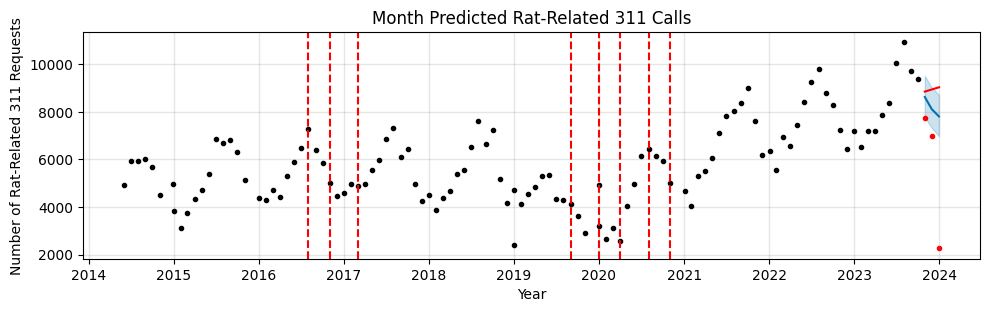

In [52]:
monthly_m = Prophet()

monthly_forecast = get_forecast(model=monthly_m, 
                               train=monthly_train, 
                               test=monthly_test, 
                               level="month")

In [53]:
percentage_in_confidence_interval(monthly_forecast)

{'below expected range': 100.0}

In [54]:
mean_absolute_percentage_error(monthly_forecast)

90.88630448379924

The goal of creating this predictive model is to give real-time indications of where rat-related 311 requests are outside of expectations, so aggregating at the month level would not give the right level of quick feedback for decision making. 

Although the weekly model has a poor model fit with the default model, it's shape seems to be a right for the data and therefore might be a better candidate for parameter fine tuning in order to improve model predictions.

#### Parameter Tuning

*Default Model*

The default Prophet models above used the following parameters, descriptions below.

__init__(self, growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)

There are a lot of parameters to unpack (you can explore all of them by uncommenting the code below (help(Prophet)), but let's explore a few that will help control how our model will work.

In [ ]:
#help(Prophet)

*Changepoints*

Changepoints are essentially *dates* where there was a shift in behavior in the time series data. In many real-world scenarios, time series data can exhibit various structural breaks due to external events, policy changes, or shifts in user behavior (think: COVID and it's impact on reporting 311 requests in March 2020). If these changepoints are not appropriately accounted for, the forecasting model may have a harder time separating the trend line from seasonal patterns and therefore might make unreliable predictions.

Prophet allows for automatic detection of changepoints by considering potential locations in the time series where a change might occur. It then evaluates the impact of each potential changepoint on the overall model performance and selects the most relevant ones to incorporate in the forecasting process. 

In order to capture these changepoints appropriately in the model, there are a few parameters that are relevant:
* `changepoint_range` (*default: 0.8*): Proportion of history in which trend changepoints will be estimated. Defaults to 0.8 for the first 80%. Not used if `changepoints` is specified. 
* `changepoint_prior_scale` (*default: 0.5*): Parameter that controls the flexibility of the trend around the changepoints. Higher values make the trend more flexible, allowing it to fit more closely to the data points and potentially capturing more changepoints. 

By identifying and including changepoints in the model, Prophet can better adapt to the time series data's inherent non-stationarity and provide more accurate and robust forecasts. However, it's essential to strike a balance when choosing the changepoint_prior_scale parameter to avoid overfitting to noise or detecting too many changepoints.

For our purposes, we can do some tests to explore what changepoint parameters best fit our city-wide weekly model.

##### Modeling seasonality with fourier series

Fourier series is a mathematical technique that can approximate a wide range of periodic functions by combining sine and cosine functions with different frequencies and amplitudes. In the context of Prophet, the Fourier order determines the number of Fourier terms used to model the seasonality component of the time series. Each Fourier term is composed of two components: a sine term and a cosine term. These terms combine to form a wave pattern with a particular frequency. By increasing the Fourier order, you allow the model to capture more complex and higher-frequency seasonality patterns in the data.

As we increase the fourier order (from 1 to 4), we can see below that the line is more sensitive to fluctuations in faster-changing cycles.

![Fourier](https://miro.medium.com/v2/resize:fit:512/1*hBR26OFeHQgRS2XFC3QZMA.gif "fourier")
<h6><center>(credit: Deepti Goyal, Analytics Vidhya)</center></h6>

Choosing the appropriate Fourier order for the relevant data is crucial in the Prophet model, as using too few terms might result in underfitting, leading to the model being unable to capture the full complexity of the seasonality. On the other hand, using too many terms can lead to overfitting, where the model fits noise in the data rather than true patterns.

In order to capture these changepoints appropriately in the model, there are a few parameters that are relevant:
* `yearly_seasonality` (*default: 'auto'*): Fit yearly seasonality. Can be 'auto', True, False, or a number of Fourier terms to generate.
* `weekly_seasonality` (*default: 'auto'*): Fit weekly seasonality. Can be 'auto', True, False, or a number of Fourier terms to generate.
* `daily_seasonality` (*default: 'auto'*): Fit daily seasonality. Can be 'auto', True, False, or a number of Fourier terms to generate.

According to [greykite](https://linkedin.github.io/greykite/docs/0.1.0/html/pages/model_components/0300_seasonality.html#:~:text=Usually%20monthly%20seasonality%20has%20a,its%20Fourier%20order%20to%202.), a time-series forecasting library, typical values are <= 4, up to 12 for daily seasonality, and up to 15 for yearly seasonality. The forecast will not improve (and may get worse) if Fourier order is too high.

The Fourier order k should satisfy k <= (n_levels+1)/2. n_levels is the number of possible values in a cycle. For example, if your input data is at daily frequency:

* monthly seasonality: n_levels=31 days in a month. 

* weekly seasonality: n_levels=7 days in a week. 

* daily seasonality: n_levels=1 hours in a day.

Therefore if we use weekly data, then the following would apply:

* yearly seasonality: n_levels=52 weeks in a year. (52 + 1)/2 = 26.5 max

* quarterly seasonality: n_levels=13 weeks in a quarter. (13 + 1)/2 = 7 max

* monthly seasonality: n_levels=4 weeks in a month. (4 + 1)/2 = 2.5 max


For our purposes, we can do some tests to explore what fourier parameters to use to fine tune our models.

In [55]:
# set options of parameters to test
params = {
    # changepoint parameters
    'changepoint_range': [0.8, 0.85, 0.9],
    'changepoint_prior_scale': [0.5, 0.6, 0.7],
    # seasonality parameters
    'm_fourier': [False, 2, 3],
    'q_fourier': [False, 4, 5, 6, 7],
    'y_fourier': [False, 10, 11, 12]
}

In order to see what parameters work the best, let's run all combinations of these parameters and see which models perform best. First, let's make sure that the amount of model runs is reasonable to test (less than 600 or so is fine and should only take a minute or so).

In [56]:
# Generate all combinations of parameters
all_params = [dict(zip(params.keys(), v)) for v in itertools.product(*params.values())]
len(all_params)

540

Because we will likely need to do these for smaller geographies, we can functionalize this optimization process (called grid searching), returning the parameters that optimize the percentage of actual values within the confidence interval, and then the mean_absolute_percentage_error if there is a tie for "within CI".

In [57]:
def build_model(params):
    '''
    Builds a model given a dictionary of parameters:
    
    Inputs: params (dict), keys are names of Prophet() parameters, values are the values of the parameters
    Returns: Prophet model object    
    '''
    # set model with passed in parameters
    m = Prophet(changepoint_range=params['changepoint_range'],
                changepoint_prior_scale=params['changepoint_prior_scale'],

                # defaults across all models
                daily_seasonality=False,
                weekly_seasonality=False)

    # add seasonality
    if params['m_fourier'] != False:
        m.add_seasonality(name='monthly', period=30.5, fourier_order=int(params['m_fourier']))
    if params['q_fourier'] != False:
        m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=int(params['q_fourier']))
    if params['y_fourier'] != False:
        m.add_seasonality(name='yearly', period=365.25, fourier_order=int(params['y_fourier']))

    return m

In [58]:
from joblib import Parallel, delayed

def evaluate_model(params, level, train, test):
    '''
    Generates dictionary of performance metrics for a model, including the params used to generate the model.
    
    Inputs: 
        params: dictionary of model parameters to use
        level: string, either 'date', 'week', or 'month'
        train: pandas Dataframe of train data (includes 'ds','y' - output of train_test_split function)
        test: pandas Dataframe of test data (includes 'ds','y'- output of train_test_split function)
    
    Returns: dictionary with metrics to evaluate model and params used to generate the model.
    '''
    # set model with passed in parameters
    m = build_model(params=params)
        
    # get forecast
    forecast = get_forecast(model=m, 
                            train=train, 
                            test=test, 
                            level=level,
                            plot=False)

    # create dictionary to track the performance metrics for each model run and populate dict with perfomance stats
    model_performance = {}
    
    # add all params to dictionary
    for key, value in params.items():
        model_performance[key] = value
    
    # add MAPE and percent in CI to dictionary
    model_performance['mean_absolute_percentage_error'] = mean_absolute_percentage_error(forecast)

    for key, value in percentage_in_confidence_interval(forecast).items():
        model_performance[key] = value

    return model_performance

In [59]:
from datetime import date

def grid_search(df, all_params, level, return_best_model_only, n_months_to_predict):
    '''
    Tries all possible model options to find the best params to optimize the model based on highest percentage within
    expected range and lowest MAPE.
    
    Inputs:
        df: pandas dataframe (before spliting for train, test - all data of interest)
        all params: list of dictionaries that have all possible options of params to try
        return_best_model_only: boolean, True if you want only the best params available, 
            False if you want results for all the models generated
        n_months_to_predict: integer for the number of months of data you want to predict
    
    Returns: df of ranked models or dictionary of the params of the best model only 
        (depending on the boolean value for 'return_best_model_only')  
    '''

    aggregated_df = get_aggregates(df, level)

    train, test = train_test_split(df=aggregated_df, 
                                   n_months_to_predict=n_months_to_predict)

    #if not enough data in either set for meaningful predictions
    if train.shape[0] < 5 or test.shape[0] == 0:
        return {}
    
    results = Parallel(n_jobs=-1)(delayed(evaluate_model)(params,level,train,test) for params in all_params)

    ranked_models = pd.DataFrame.from_records(results).sort_values(['within expected range', 'mean_absolute_percentage_error'],
                                                               ascending=[False, True])
    
    if return_best_model_only is True:
        return ranked_models.iloc[0]
    else:
        return ranked_models

In [60]:
ranked_models = grid_search(df=df, 
                            all_params=all_params,
                            level='week', 
                            return_best_model_only=False,
                            n_months_to_predict=3)

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
13:26:17 - cmdstanpy - INFO - Chain [1] start processing
13:26:17 - cmdstanpy - INFO - Chain [1] start processing
13:26:17 - cmdstanpy - INFO - Chain [1] start processing
13:26:17 - cmdstanpy - INFO - Chain [1] done processing
13:26:17 - cmdstanpy - I

In [ ]:
ranked_models.head(10)

The above table shows us the top 10 models given the range of parameters tested. The best weekly model is a great improvement from our default model just by changing a few parameters! We went from 1.9% within our prediction confidence interval to over 50%. This shows that Prophet is super sensitive to these parameters.

#### Modifying test/train split

Test to see if changing the dates for the train/test split help improve model fit.

In [ ]:
best_city_model = ranked_models.iloc[0].to_dict()
best_city_model

In [ ]:
model_performance_dates = {}
level = 'week'

weekly = get_aggregates(df, level=level)

for n_months in range(12,1,-1):
    # use function to get training and test data sets
    train, test = train_test_split(df=weekly, 
                                   n_months_to_predict=n_months)

    # set model with passed in parameters
    m = build_model(params=best_city_model)
    
    # get forecast
    forecast = get_forecast(model=m, 
                            train=train, 
                            test=test, 
                            level=level,
                            plot=False,
                            title_suffix= str(n_months)+" months")
    
    model = {}
    
    # add MAPE and percent in CI to dictionary
    model['mean_absolute_percentage_error'] = mean_absolute_percentage_error(forecast)

    for key, value in percentage_in_confidence_interval(forecast).items():
        model[key] = value

    # save dictionary to model_performance dictionary
    model_performance_dates[n_months] = model

pd.DataFrame(model_performance_dates).T

#### Creating Custom Models for Smaller Geographies

Now, lets retrieve the best hyperparameters for each model at borough level.

In [ ]:
df.loc[:,'borough'].value_counts()

In [ ]:
def get_best_models_by(aggregation_level, df, all_params, level, n_months_to_predict):
    '''
    Repeats the grid search for all unique values in a certain geography or other
    aggregation level, returning the best params for each aggregation level.
    
    Inputs:
        aggregation_level: string, intended to be a column name of geographies but can
            be more flexible if needed. Examples are: `borough`, `community_board`, and
            `rat_mitigation_zone`.     
        df: pandas dataframe (before spliting for train, test - all data of interest)
        all params: list of dictionaries that have all possible options of params to try
        level: string, either 'date', 'week', or 'month'
        return_best_model_only: boolean, True if you want only the best params available, 
            False if you want results for all the models generated
        n_months_to_predict: integer for the number of months of data you want to predict
    
    Returns: dictionary of the best params for each aggregation level and for the aggregate 
    '''
    parameters_by_geog = {}
    
    unique_geogs = pd.Series(df.loc[:,aggregation_level].unique())
    unique_geogs = unique_geogs[unique_geogs.notnull()]

    for geog, n in df.loc[:,aggregation_level].value_counts().to_dict().items():
        
        #ignore certain geography types
        if 'Unspecified' in geog or 'nan' in geog:
            continue

        #ignore CBs with too little data
        if n < 100:
            continue

        print("retrieiving best model for ", geog, "...")

        # subset df by area of interest
        df_subset = df.loc[df.loc[:,aggregation_level] == geog,:]
        best_model = grid_search(df=df_subset, 
                                 all_params=all_params, 
                                 level=level, 
                                 return_best_model_only=True,
                                 n_months_to_predict=n_months_to_predict)

        print("found best model for ", geog, ".")

        parameters_by_geog[geog] = best_model
    
    return parameters_by_geog

In [ ]:
borough_params = get_best_models_by(aggregation_level='borough', 
                                    df=df, 
                                    all_params=all_params, 
                                    level='week',
                                    n_months_to_predict=3)

The "best" weekly borough models vary in parameters, so it is important to use the grid_search method in order to find the best model for each geographic subset.

In [ ]:
borough_params

Now we can do the same thing at the community_board level.

In [ ]:
# community_board_params = get_best_models_by(aggregation_level='community_board', 
#                                             df=df, 
#                                             all_params=all_params, 
#                                             level='week',
#                                             n_months_to_predict=3)

Create new df that subsets to only requests in RMZs. Then create estimates at that level as well.

In [ ]:
# #subset df to only RMZs
# df_only_rmzs = df.loc[df.loc[:,'is_rmz'].notna(),:]

# best_all_rmz_model = grid_search(df=df_only_rmzs, 
#                                 all_params=all_params,
#                                 level='week', 
#                                 return_best_model_only=True,
#                                 n_months_to_predict=3)

In [ ]:
# rat_mitigation_zone_params = get_best_models_by(aggregation_level='rat_mitigation_zone', 
#                                             df=df_only_rmzs, 
#                                             all_params=all_params, 
#                                             level='week',
#                                             n_months_to_predict=3)

In [ ]:
# rat_mitigation_zone_params

### Data Export for PowerBI


Now that we're all set up with the best models for each geography, let's package the data to use in the PowerBI dashboard.

In [ ]:
from datetime import date

def save_as_csv(parameters_by_geog,
               parameters_citywide,
               aggregation_level, 
               df,
               level,
               n_months_to_predict=3):
    '''
    Use the best params for each aggregation level to make predictions and then save the data accordingly.
    
    Inputs:
        parameters_by_geog: dictionary, key is a string of the unit of geography, value is a dictionary with
            the best parameters to use for that unit of geography
        parameters_citywide: dictionary, key is the string name of the param, value is a string of the param
        aggregation_level: string, intended to be a column name of geographies but can
            be more flexible if needed. Examples are: `borough`, `community_board`, and
            `rat_mitigation_zone`.     
        df: pandas dataframe (before spliting for train, test - all data of interest)
        level: string, either 'date', 'week', or 'month'
        n_months_to_predict: integer for the number of months of data you want to predict
    
    Returns: combined pandas dataframe of all predicted values, with 'geography' as the column that distinguishes
        between the predictions of each type. Saves the dataframe as a csv to a folder called 'history', 
        with the filepath as the name of the aggregation level and the date of the run 
        (e.g. 'borough_predictions_2023-08-08.csv').
    '''
    
    df_list = []

    # get city-wide predictions
    city_df = get_aggregates(df=df, level=level)

    train, test = train_test_split(df=city_df, 
                                   n_months_to_predict=n_months_to_predict)
    
    m = build_model(parameters_citywide)

    forecast = get_forecast(model=m, 
                        train=train, 
                        test=test, 
                        level=level,
                        plot=False,
                        title_suffix='All NYC')
    
    #couple extra columns for PowerBI
    forecast.loc[:,'in_conf_int'] = "within expected range"
    forecast.loc[(forecast.loc[:,'y'] > forecast.loc[:,'yhat_upper']), 'in_conf_int'] = "above expected range"
    forecast.loc[(forecast.loc[:,'y'] < forecast.loc[:,'yhat_lower']), 'in_conf_int'] = "below expected range"
    forecast['difference'] = forecast['y'] - forecast['yhat']

    #numeric column
    forecast.loc[:,'in_conf_int_numeric'] = 1
    forecast.loc[(forecast.loc[:,'y'] > forecast.loc[:,'yhat_upper']), 'in_conf_int_numeric'] = 2
    forecast.loc[(forecast.loc[:,'y'] < forecast.loc[:,'yhat_lower']), 'in_conf_int_numeric'] = 0
    
    full_df = pd.concat([train.loc[:,['ds','y']], forecast], axis=0)
    
    if aggregation_level == 'rat_mitigation_zone':
        full_df.loc[:, 'geography'] = 'ALL RMZs'
    else:
        full_df.loc[:, 'geography'] = 'ALL NYC'

    df_list.append(full_df)

    # get predictions at aggregation level
    for geog, params in parameters_by_geog.items():

        df_subset = df.loc[df.loc[:,aggregation_level] == geog,:]
        
        aggregated_df = get_aggregates(df=df_subset, level=level)
        
        # use function to get training and test data sets
        train, test = train_test_split(df=aggregated_df, 
                                       n_months_to_predict=n_months_to_predict)

        # set model with passed in parameters
        m = build_model(params)
        
        # get forecast
        forecast = get_forecast(model=m, 
                                train=train, 
                                test=test, 
                                level=level,
                                plot=False,
                                title_suffix=geog)
        
        #couple extra columns for PowerBI
        forecast.loc[:,'in_conf_int'] = "within expected range"
        forecast.loc[(forecast.loc[:,'y'] > forecast.loc[:,'yhat_upper']), 'in_conf_int'] = "above expected range"
        forecast.loc[(forecast.loc[:,'y'] < forecast.loc[:,'yhat_lower']), 'in_conf_int'] = "below expected range"
        forecast['difference'] = forecast['y'] - forecast['yhat']

        #numeric column
        forecast.loc[:,'in_conf_int_numeric'] = 1
        forecast.loc[(forecast.loc[:,'y'] > forecast.loc[:,'yhat_upper']), 'in_conf_int_numeric'] = 2
        forecast.loc[(forecast.loc[:,'y'] < forecast.loc[:,'yhat_lower']), 'in_conf_int_numeric'] = 0
        
        full_df = pd.concat([train.loc[:,['ds','y']], forecast], axis=0)
        full_df.loc[:, 'geography'] = geog #.upper()

        df_list.append(full_df)
        
    combined_df = pd.concat(df_list, axis=0)
    combined_df['ds'] = combined_df['ds'].apply(lambda x: x.round('D'))
    
    #save locally
    filepath_history = 'history/'+ aggregation_level + '_predictions_' + str(date.today()) + '.csv'
    combined_df.to_csv(filepath_history)
    
    return combined_df

Use the above function to generate predictions at three different levels of geography.

In [ ]:
borough_predictions = save_as_csv(parameters_by_geog=borough_params,
                                 parameters_citywide=best_city_model,
                                 aggregation_level='borough',
                                 df=df,
                                 level='week',
                                 n_months_to_predict=3)

In [ ]:
borough_predictions

In [ ]:
community_board_predictions = save_as_csv(parameters_by_geog=community_board_params,
                                         parameters_citywide=best_city_model,
                                         aggregation_level='community_board',
                                         df=df,
                                         level='week',
                                         n_months_to_predict=3)

In [ ]:
community_board_predictions

In [ ]:
# rat_mitigation_zone_predictions = save_as_csv(parameters_by_geog=rat_mitigation_zone_params,
#                                              parameters_citywide=best_all_rmz_model,
#                                              aggregation_level='rat_mitigation_zone',
#                                              df=df_only_rmzs,
#                                              level='week',
#                                              n_months_to_predict=3)

For ease of use in PowerBI, concatentate the community board and rat mitigation zone predictions together.

In [ ]:
# #combine these into one dataframe
# cb_and_rmz_predictions = pd.concat([community_board_predictions.reset_index(), 
#                                     rat_mitigation_zone_predictions.reset_index()], axis=0).drop(columns=['index'])

# # THIS OVERRIDES THE HISTORIC VERSIONS OF THE MODEL - ONLY DO THIS WHEN YOU WANT TO RESET THE DASHBOARD DATA
# # borough_predictions.to_csv("borough_predictions.csv")
# # cb_and_rmz_predictions.drop(columns='index').to_csv("cb_and_rmz_predictions.csv")

##### Appending most recent weekly predictions to the end of the existing dataframes

In order to keep the dashboard values constant, we will only append the new model predictions to the existing csvs.

In [ ]:
# def update_dashboard_predictions(filepath, updated_predictions):
#     '''
#     Appends on the dates not already in the dashboard predictions to the csv.
    
#     Inputs:
#         filepath (str): 'borough_predictions.csv' or 'cb_and_rmz_predictions.csv'
#         updated_predictions: pandas DataFrame from the above functions
    
#     Returns: nothing. Prints an update of what action is performed, but changes the csv in place.
#     '''
    
#     dashboard_predictions = pd.read_csv(filepath)
    
#     # do not modify if there is no new data
#     if max(updated_predictions['ds']) == pd.to_datetime(max(dashboard_predictions['ds'])):
#         print(f'No new complete week predictions for {filepath} to include. No changes to csv.')
#         return
    
#     newest_rows = updated_predictions.loc[updated_predictions.loc[:,'ds'] == max(updated_predictions['ds']),:]
    
#     print(f'Appending new complete week predictions to {filepath}...')
#     updated_dashboard_predictions = pd.concat([dashboard_predictions.reset_index(), 
#                                                newest_rows.reset_index()], axis=0).drop(columns=['index','Unnamed: 0'])
    
#     #make sure all dates are in the same datetime format
#     updated_dashboard_predictions.loc[:,'ds'] = pd.to_datetime(updated_dashboard_predictions.loc[:,'ds']).dt.round('D')

#     #resave as csv, overwriting the current predictions
#     print(f'Overwriting {filepath}')
#     updated_dashboard_predictions.to_csv(filepath)
    
#     return

In [ ]:
# update_dashboard_predictions('borough_predictions.csv', borough_predictions)
# update_dashboard_predictions('cb_and_rmz_predictions.csv', cb_and_rmz_predictions)

##### Saving to the Sharepoint Folder

Now that we have the csvs we want to use for the dashboard, we need to connect to a [Sharepoint Site](https://nycdoitt.sharepoint.com/sites/Cityhall-RDPDataRepository/dashboards/Forms/AllItems.aspx?id=%2Fsites%2FCityhall%2DRDPDataRepository%2Fdashboards%2FRatStat&p=true&ga=1) that can store this data in order to feed into the dashboard. To connect, we need to save the following as environmental variables before proceeding: `RDP_SHAREPOINT_URL`, `RDP_SHAREPOINT_CLIENT_ID`, and `RDP_SHAREPOINT_CLIENT_SECRET`.

This project has these variables already saved.

Martha Norrick (current CAO) created a few custom functions to connect to a Sharepoint site through Domino and save files directly. These functions are saved in the `sharepoint_helpers.py` script in this directory. We can first import the functions we need to use, and then use them to save our predictions csvs accordingly.

In [ ]:
# pip install office365-REST-Python-Client

In [ ]:
# import os
# from office365.sharepoint.client_context import ClientContext
# from office365.runtime.auth.client_credential import ClientCredential

# from input.sharepoint_helpers import instatiate_sharepoint_conn, enum_folder_gen_list, append_name_to_list
# from input.sharepoint_helpers import list_sharepoint_files_in_folder, extract_files, upload_file_to_sharepoint

# os.chdir('/mnt')
# ctx = instatiate_sharepoint_conn()
# target_folder_url = "dashboards/RatStat"

In [ ]:
# upload_file_to_sharepoint(ctx, 'borough_predictions.csv', target_folder_url)
# upload_file_to_sharepoint(ctx, 'cb_and_rmz_predictions.csv', target_folder_url)

Done!